In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [3]:
x= np.arange(-80, 81, 0.5)
y= x**2 +5 *x +3
print('y_shape is {} \nx_shape is {}'.format(y.shape,x.shape))
print(f"y_shape is {y.shape} and x_shape is {x.shape}")
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y , test_size=0.2)
x_train.shape , x_test.shape

y_shape is (322,) 
x_shape is (322,)
y_shape is (322,) and x_shape is (322,)


((257,), (65,))

In [7]:
model_2= keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))

optimizer= keras.optimizers.RMSprop(learning_rate=0.0001)
loss=keras.losses.mean_squared_error
metric=tf.metrics.MeanSquaredError()
model_2.compile( optimizer=optimizer , loss=loss, metrics=metric)
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
hist=model_2.fit(x_train, y_train, epochs=1000, batch_size=64, callbacks=[early_stop], validation_data=(x_test, y_test) )
model_2.summary()

Epoch 1/1000
5/5 [==============================] - 3s 54ms/step - loss: 8608123.0000 - mean_squared_error: 8608123.0000 - val_loss: 7896860.0000 - val_mean_squared_error: 7896860.0000
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 8580592.0000 - mean_squared_error: 8580592.0000 - val_loss: 7875121.0000 - val_mean_squared_error: 7875121.0000
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 8557704.0000 - mean_squared_error: 8557704.0000 - val_loss: 7859365.0000 - val_mean_squared_error: 7859365.0000
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 8537269.0000 - mean_squared_error: 8537269.0000 - val_loss: 7835762.0000 - val_mean_squared_error: 7835762.0000
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 8511075.0000 - mean_squared_error: 8511075.0000 - val_loss: 7809412.5000 - val_mean_squared_error: 7809412.5000
Epoch 6/1000
5/5 [==============================] - 0s 17ms/step - loss: 84

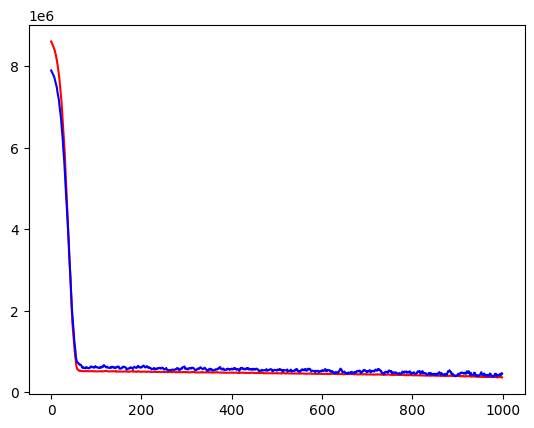

In [8]:
plt.plot(hist.history['loss'], color='red')
plt.plot(hist.history['val_loss'], color='blue')
plt.show()